In [2]:
pwd


'/home/wsuser/work'

In [3]:
!pip install keras
!pip install tensorflow

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='zcVuC0eEkDb8OjD1Rv10jEJhb_a8BNFpQfbjJcfUM8oI',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'cnnmodel-donotdelete-pr-tnnjpidjzmthuw'
object_key = 'Dataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [7]:
from io import BytesIO
import zipfile as zf
unzip =  zf.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [8]:
pwd

'/home/wsuser/work'

In [9]:
import os 
filenames = os.listdir('/home/wsuser/work/Dataset/training_set')

In [10]:
x_train = train_datagen.flow_from_directory("/home/wsuser/work/Dataset/training_set", target_size=(64,64),batch_size=100,
                                            class_mode='categorical', color_mode ="grayscale")

Found 15750 images belonging to 9 classes.


In [11]:
x_test = test_datagen.flow_from_directory("/home/wsuser/work/Dataset/test_set", target_size=(64,64),batch_size=100,
                                         class_mode='categorical', color_mode ="grayscale")

Found 2250 images belonging to 9 classes.


In [12]:
len(x_train)

158

In [13]:
len(x_test)

23

In [14]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

##MODEL BUILDING

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [16]:
#Creating the model
model=Sequential()
#Adding the layers
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#adding hidden layers
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))

#Adding the output layer
model.add(Dense(9, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)

/tmp/wsuser/ipykernel_164/43643550.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)


Epoch 1/10
30/30 [==============================] - 16s 526ms/step - loss: 0.9244 - accuracy: 0.6830 - val_loss: 0.3537 - val_accuracy: 0.9133
Epoch 2/10
30/30 [==============================] - 13s 430ms/step - loss: 0.2529 - accuracy: 0.9280
Epoch 3/10
30/30 [==============================] - 13s 412ms/step - loss: 0.1506 - accuracy: 0.9536
Epoch 4/10
30/30 [==============================] - 13s 419ms/step - loss: 0.0930 - accuracy: 0.9717
Epoch 5/10
30/30 [==============================] - 12s 410ms/step - loss: 0.0659 - accuracy: 0.9797
Epoch 6/10
30/30 [==============================] - 13s 422ms/step - loss: 0.0680 - accuracy: 0.9833
Epoch 7/10
30/30 [==============================] - 13s 413ms/step - loss: 0.0593 - accuracy: 0.9810
Epoch 8/10
30/30 [==============================] - 13s 414ms/step - loss: 0.0295 - accuracy: 0.9933
Epoch 9/10
30/30 [==============================] - 12s 397ms/step - loss: 0.0278 - accuracy: 0.9913
Epoch 10/10
30/30 [==============================

In [19]:
model.save('realtime.h5')

In [20]:
!tar -zcvf imagetrain.tgz realtime.h5

realtime.h5


##TEST THE MODEL




In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [24]:
model = load_model('/home/wsuser/work/realtime.h5')

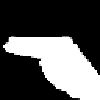

In [25]:
img = image.load_img('/home/wsuser/work/Dataset/test_set/H/107.png',target_size = (100,100))
img

In [26]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [27]:
img=image.load_img("/home/wsuser/work/Dataset/test_set/H/107.png")
detect(img)

THE PREDICTED LETTER IS  H


In [28]:
img = image.load_img('/home/wsuser/work/Dataset/test_set/A/110.png')
pred=detect(img)

THE PREDICTED LETTER IS  A


In [29]:
img=image.load_img('/home/wsuser/work/Dataset/test_set/E/111.png')
detect(img)

THE PREDICTED LETTER IS  E


In [48]:
!tar  -zcvf imagetrain.tgz realtime.h5

realtime.h5


In [31]:
!pip install watson-machine-learning-client


     |████████████████████████████████| 538 kB 9.6 MB/s eta 0:00:01


In [32]:
!pip install ibm_watson_machine_learning


In [33]:
ls -1


Dataset/
imagetrain.tgz
realtime.h5


In [35]:
from ibm_watson_machine_learning import APIClient

cloud_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"1Fka0MEg0RsjuXZFn40OXdxArFxyHRxSjjaZfrpshZmQ"
}

client=APIClient(cloud_credentials)

In [36]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [37]:
space_uid = guid_from_space_name(client, 'imagetrain')
print("space UID = " + space_uid)

space UID = 64e30230-9762-4237-ae4a-6a42fdbf7b50


In [38]:
client.set.default_space(space_uid)


'SUCCESS'

In [39]:
client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [40]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid


'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [49]:
model_details = client.repository.store_model(model='imagetrain.tgz',meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "keras_2.2.4",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id = client.repository.get_model_uid(model_details)

Failure during creating model. (POST https://us-south.ml.cloud.ibm.com/ml/v4/models?version=2021-06-24&space_id=64e30230-9762-4237-ae4a-6a42fdbf7b50)
Status code: 400, body: {
  "trace": "6a15c823d5a0c08dc3aadf18da306f1d",
  "errors": [{
    "code": "invalid_request_entity",
    "message": "Invalid request entity: Unsupported model type and software specification combination: 'keras_2.2.4' and 'acd9c798-6974-5d2f-a657-ce06e986df4d'",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "400"
}


ApiRequestFailure: Failure during creating model. (POST https://us-south.ml.cloud.ibm.com/ml/v4/models?version=2021-06-24&space_id=64e30230-9762-4237-ae4a-6a42fdbf7b50)
Status code: 400, body: {
  "trace": "6a15c823d5a0c08dc3aadf18da306f1d",
  "errors": [{
    "code": "invalid_request_entity",
    "message": "Invalid request entity: Unsupported model type and software specification combination: 'keras_2.2.4' and 'acd9c798-6974-5d2f-a657-ce06e986df4d'",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "400"
}

In [52]:
model_id

NameError: name 'model_id' is not defined

In [51]:
model.save('realtime.h5')
